<a href="https://colab.research.google.com/github/joesiheon496/ModelPractice/blob/master/%EB%B6%80%EC%A0%95%ED%83%90%EC%A7%80%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/2023/UDEMYPRECTICE/DEEPLEARNING/Part 4 - Self_Organizing_Maps/Credit_Card_Applications.csv')

In [3]:
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [4]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [7]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [9]:
%cd /content/drive/MyDrive/2023/UDEMYPRECTICE/DEEPLEARNING/Part 4 - Self_Organizing_Maps

/content/drive/MyDrive/2023/UDEMYPRECTICE/DEEPLEARNING/Part 4 - Self_Organizing_Maps


In [11]:
!pip install Minisom

  Preparing metadata (setup.py) ... done
  Created wheel for Minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=41b4d1f364bc9718e214a5f7b3f66914d3db6f282218946b221b8b0e7729c678
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built Minisom


In [12]:
from minisom import MiniSom

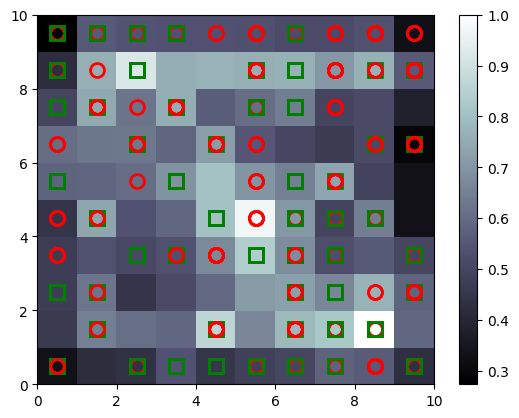

In [14]:
som = MiniSom(x = 10, y = 10, input_len=15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100,)

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [15]:
mapping = som.win_map(X)

In [ ]:
mapping

In [18]:
frauds = np.concatenate((mapping[(8,1)], mapping[(2,9)]),axis=0)

In [20]:
frauds = sc.inverse_transform(frauds)

In [21]:
frauds

array([[1.5683168e+07, 1.0000000e+00, 2.9580000e+01, 4.5000000e+00,
        2.0000000e+00, 9.0000000e+00, 4.0000000e+00, 7.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 2.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 3.3000000e+02, 1.0000000e+00],
       [1.5618410e+07, 1.0000000e+00, 2.3080000e+01, 2.5000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.0850000e+00,
        1.0000000e+00, 1.0000000e+00, 1.1000000e+01, 1.0000000e+00,
        2.0000000e+00, 6.0000000e+01, 2.1850000e+03],
       [1.5617348e+07, 1.0000000e+00, 6.3330000e+01, 5.4000000e-01,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 5.8500000e-01,
        1.0000000e+00, 1.0000000e+00, 3.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.8000000e+02, 1.0000000e+00],
       [1.5682860e+07, 1.0000000e+00, 2.7830000e+01, 1.5000000e+00,
        2.0000000e+00, 9.0000000e+00, 4.0000000e+00, 2.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.1000000e+01, 1.0000000e+00,
        2.0000000e+00,